In [1]:
%store -r df
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer

import matplotlib.pyplot as plt
import seaborn as sns

## Pre-processing  
- Remove id, flight, source & destination city (the distance between source & destination city is already captured by “duration of flight in hours”) 
- Transform if there’s skewness for any features
- Normalise using standardscaler
- Remove outliers if there is  
- C1: target encoding for the categorical variables 


In [2]:
# Remove Columns id, flight, source & destination city
columns_remove = ['flight', 'source_city', 'destination_city']
df1 = df.drop(columns = columns_remove)

In [3]:
df1.describe(include = "all")

,airline,departure_time,stops,arrival_time,class,duration,days_left,price,duration_sqrt_scaled,price_boxcox_scaled,days_left_scaled
count,298836,298836,298836,298836,298836,298836.000000,298836.000000,298836.000000,2.988360e+05,2.988360e+05,2.988360e+05
unique,6,6,3,6,2,NaN,NaN,NaN,NaN,NaN,NaN
top,Vistara,Morning,one,Night,Economy,NaN,NaN,NaN,NaN,NaN,NaN
freq,127093,70682,249883,90930,206007,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,12.160646,26.042505,20754.298883,-3.385847e-16,1.628250e-15,1.004341e-16
std,NaN,NaN,NaN,NaN,NaN,7.106974,13.546130,22490.224816,1.000002e+00,1.000002e+00,1.000002e+00
min,NaN,NaN,NaN,NaN,NaN,0.830000,1.000000,1105.000000,-2.263954e+00,-2.770132e+00,-1.848686e+00
25%,NaN,NaN,NaN,NaN,NaN,6.750000,15.000000,4772.000000,-6.789937e-01,-7.447672e-01,-8.151792e-01
50%,NaN,NaN,NaN,NaN,NaN,11.250000,26.000000,7425.000000,3.128926e-02,-2.646852e-01,-3.137796e-03
75%,NaN,NaN,NaN,NaN,NaN,16.080000,38.000000,42457.000000,6.474909e-01,1.187306e+00,8.827255e-01


### Target Encoding for Catagorical Variables

In [4]:
# Capturing the categorical variables
cat_cols = list(df1.select_dtypes(include=['object']).columns)
print(f"Number of categorical columns: {len(cat_cols)}")
print(f"Categorical columns:\n{cat_cols}")

Number of categorical columns: 5
Categorical columns:
['airline', 'departure_time', 'stops', 'arrival_time', 'class']


In [5]:
# Capturing the numerical variables
numeric_cols = df1.select_dtypes(include=['float64', 'int64']).columns.tolist()
print(numeric_cols)

['duration', 'days_left', 'price', 'duration_sqrt_scaled', 'price_boxcox_scaled', 'days_left_scaled']


Target encoding, also known as likelihood encoding, is a method of encoding categorical features in which each category is replaced with the mean (or median) of the target variable for that category. In other words, we use the target variable to encode the categories of a categorical feature.The advantage of target encoding is that it can capture the relationship between the categorical feature and the target variable in a more precise way than one-hot encoding, especially when the categorical feature has a large number of categories. Target encoding can also reduce the dimensionality of the feature space.

In [6]:
import category_encoders as ce

# list of categorical column
te = ce.TargetEncoder(cols=cat_cols)

# Target encoding using DataFrame with the target variable
df1 = te.fit_transform(df1, df1['price_boxcox_scaled'])

In [7]:
df1

,airline,departure_time,stops,arrival_time,class,duration,days_left,price,duration_sqrt_scaled,price_boxcox_scaled,days_left_scaled
0,-0.518731,0.026656,-0.273630,0.015281,-0.577809,2.17,1.0,5953.0,-1.735912,-0.498010,-1.848686
1,-0.518731,-0.026516,-0.273630,0.061629,-0.577809,2.33,1.0,5953.0,-1.685797,-0.498010,-1.848686
2,-0.713457,-0.026516,-0.273630,-0.156916,-0.577809,2.17,1.0,5956.0,-1.735912,-0.497464,-1.848686
3,0.309109,0.005012,-0.273630,-0.047256,-0.577809,2.25,1.0,5955.0,-1.710632,-0.497646,-1.848686
4,0.309109,0.005012,-0.273630,0.061629,-0.577809,2.33,1.0,5955.0,-1.685797,-0.497646,-1.848686
...,...,...,...,...,...,...,...,...,...,...,...
296403,0.435656,0.435656,0.435656,0.435656,0.435656,NaN,NaN,NaN,1.393617,1.358138,1.104191
296404,0.435656,0.435656,0.435656,0.435656,0.435656,NaN,NaN,NaN,1.686268,1.358138,1.104191
296454,0.435656,0.435656,0.435656,0.435656,0.435656,NaN,NaN,NaN,0.066110,1.368101,1.178013
296773,0.435656,0.435656,0.435656,0.435656,0.435656,NaN,NaN,NaN,-0.771136,1.466086,-1.774864


The dataset consists of various features related to airline flights, including normalized representations of departure and arrival times, binary indicators for the presence of stops and class, as well as normalized representations for flight duration, days left, and price.

### Correlation Matrix

<Axes: >

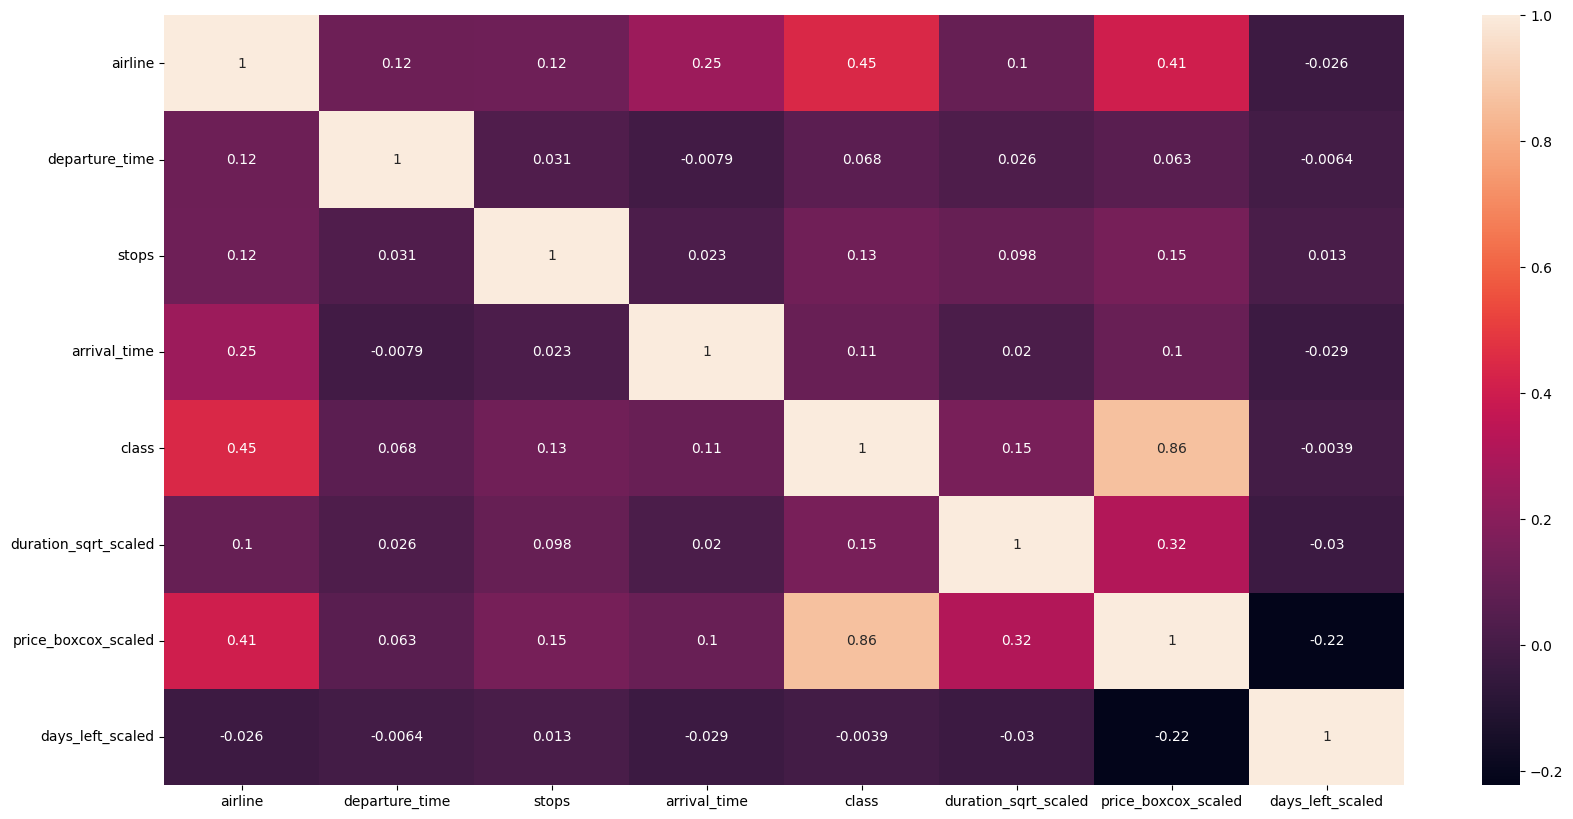

In [35]:
# Create heatmap of the correlation matrix
plt.figure(figsize=(20,10))
df_excluded = df1.drop('days_left', axis = 1 )
df_excluded = df_excluded.drop('price', axis = 1 )
df_excluded = df_excluded.drop('duration', axis = 1 )
sns.heatmap(df_excluded.corr(),annot=True)

In [11]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [12]:
corr_features=correlation(df1,0.7)
len(set(corr_features))

2

array([[<Axes: title={'center': 'airline'}>,
        <Axes: title={'center': 'departure_time'}>,
        <Axes: title={'center': 'stops'}>],
       [<Axes: title={'center': 'arrival_time'}>,
        <Axes: title={'center': 'class'}>,
        <Axes: title={'center': 'duration'}>],
       [<Axes: title={'center': 'days_left'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'duration_sqrt_scaled'}>],
       [<Axes: title={'center': 'price_boxcox_scaled'}>,
        <Axes: title={'center': 'days_left_scaled'}>, <Axes: >]],
      dtype=object)

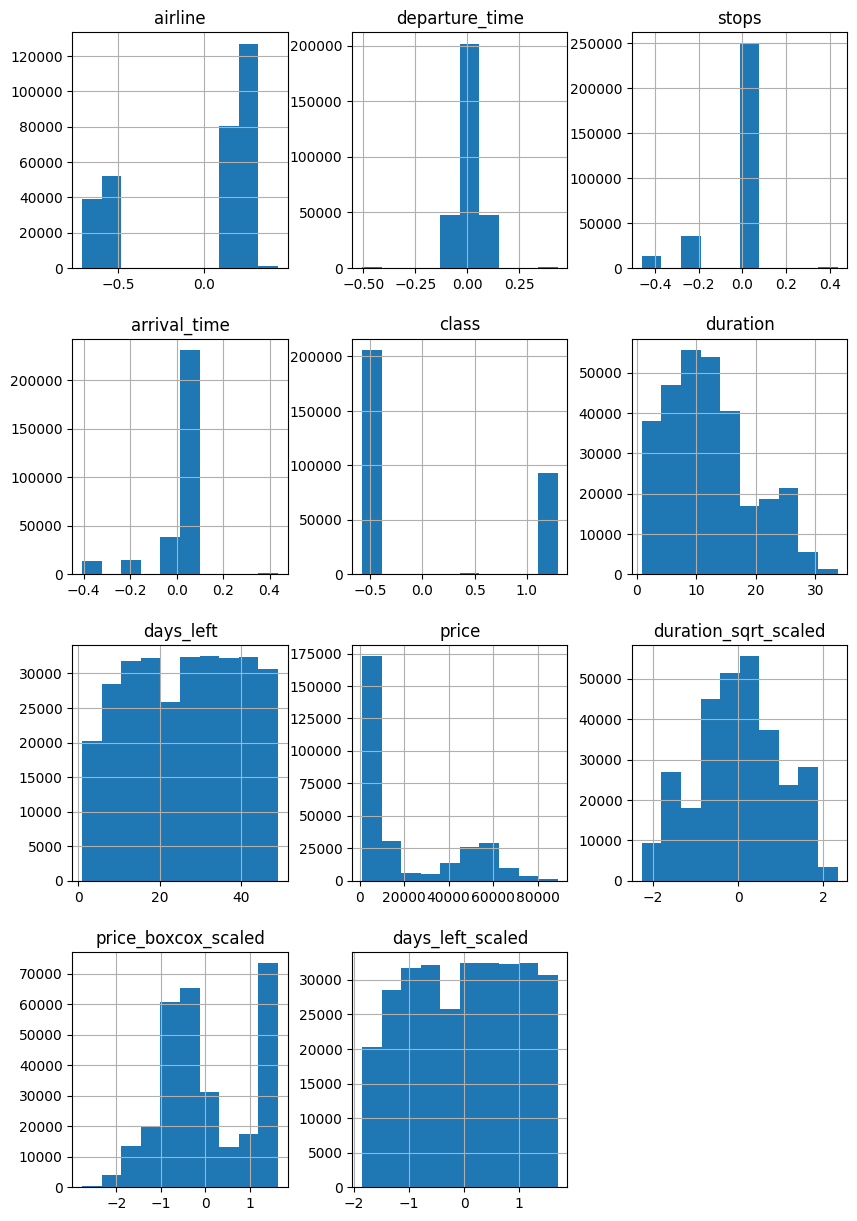

In [13]:
df1.hist(figsize=(10,15))

In [14]:
corr_features

{'price', 'price_boxcox_scaled'}

In [15]:
df1

,airline,departure_time,stops,arrival_time,class,duration,days_left,price,duration_sqrt_scaled,price_boxcox_scaled,days_left_scaled
0,-0.518731,0.026656,-0.273630,0.015281,-0.577809,2.17,1.0,5953.0,-1.735912,-0.498010,-1.848686
1,-0.518731,-0.026516,-0.273630,0.061629,-0.577809,2.33,1.0,5953.0,-1.685797,-0.498010,-1.848686
2,-0.713457,-0.026516,-0.273630,-0.156916,-0.577809,2.17,1.0,5956.0,-1.735912,-0.497464,-1.848686
3,0.309109,0.005012,-0.273630,-0.047256,-0.577809,2.25,1.0,5955.0,-1.710632,-0.497646,-1.848686
4,0.309109,0.005012,-0.273630,0.061629,-0.577809,2.33,1.0,5955.0,-1.685797,-0.497646,-1.848686
...,...,...,...,...,...,...,...,...,...,...,...
296403,0.435656,0.435656,0.435656,0.435656,0.435656,NaN,NaN,NaN,1.393617,1.358138,1.104191
296404,0.435656,0.435656,0.435656,0.435656,0.435656,NaN,NaN,NaN,1.686268,1.358138,1.104191
296454,0.435656,0.435656,0.435656,0.435656,0.435656,NaN,NaN,NaN,0.066110,1.368101,1.178013
296773,0.435656,0.435656,0.435656,0.435656,0.435656,NaN,NaN,NaN,-0.771136,1.466086,-1.774864


In [27]:
temp = df1.drop("duration", axis=1)
temp = temp.drop("days_left", axis=1)
temp = temp.drop("price", axis=1)
temp

,airline,departure_time,stops,arrival_time,class,duration_sqrt_scaled,price_boxcox_scaled,days_left_scaled
0,-0.518731,0.026656,-0.273630,0.015281,-0.577809,-1.735912,-0.498010,-1.848686
1,-0.518731,-0.026516,-0.273630,0.061629,-0.577809,-1.685797,-0.498010,-1.848686
2,-0.713457,-0.026516,-0.273630,-0.156916,-0.577809,-1.735912,-0.497464,-1.848686
3,0.309109,0.005012,-0.273630,-0.047256,-0.577809,-1.710632,-0.497646,-1.848686
4,0.309109,0.005012,-0.273630,0.061629,-0.577809,-1.685797,-0.497646,-1.848686
...,...,...,...,...,...,...,...,...
296403,0.435656,0.435656,0.435656,0.435656,0.435656,1.393617,1.358138,1.104191
296404,0.435656,0.435656,0.435656,0.435656,0.435656,1.686268,1.358138,1.104191
296454,0.435656,0.435656,0.435656,0.435656,0.435656,0.066110,1.368101,1.178013
296773,0.435656,0.435656,0.435656,0.435656,0.435656,-0.771136,1.466086,-1.774864
